In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seawater as sw

In [275]:
icefile='C:/Users/gentemann/Google Drive/f_drive/docs/projects/misst-arctic/Ice Present.xlsx'
ds = pd.read_excel(icefile, sheet_name='data',index_col=0)
ds_ice = ds.to_xarray()

In [276]:
ds_ice

<xarray.Dataset>
Dimensions:     (usv: 25)
Coordinates:
  * usv         (usv) int64 1034 1034 1034 1034 1034 ... 1036 1037 1037 1037
Data variables:
    start_time  (usv) datetime64[ns] 2019-06-19T19:00:00 ... 2019-08-04
    stop_time   (usv) datetime64[ns] 2019-06-19T22:00:00 ... 2019-08-08T18:00:00

In [277]:
ds_ice.usv.size

25

1034 0.04084663189077795 0.39371064578423787


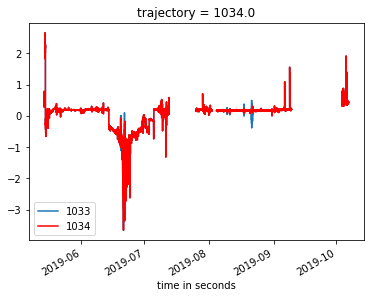

In [291]:
adir = 'F:/data/cruise_data/saildrone/2019_arctic/daily_files/'
list_usv=[1034] #,1034,1035,1036,1037]
for iusv in list_usv:
    file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
    ds = xr.open_dataset(file)
    #ds['spd']=np.sqrt(ds.UWND_MEAN**2+ds.VWND_MEAN**2)
    ds = ds.where(ds.SAL_RBR_MEAN>20)
    ds = ds.where(ds.SAL_SBE37_MEAN>20)
    ds2 = ds.isel(time=slice(250,-1))
    ice = ds_ice.sel(usv=iusv)
    sdif=ds2.SAL_SBE37_MEAN-ds2.SAL_RBR_MEAN
    sdif2 = sdif.copy(deep=True)
    ind=sdif*0
    for i in range(ice.usv.size):
        cond = (sdif.time>ice.start_time[i]) & (sdif.time<ice.stop_time[i])
        sdif2[cond]=np.nan
    sdif.plot()
    sdif2.plot(color='r')            
    strusv.append(str(iusv))
    print(iusv,sdif.mean().data,sdif.std().data)
plt.legend(strusv)

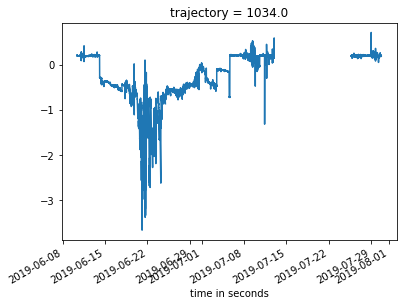

In [292]:
#1034
sdif.sel(time=slice('2019-06-10T0845','2019-07-30T16')).plot()
#1035
#sdif.sel(time=slice('2019-06-14T0845','2019-06-14T16')).plot()
#sdif.sel(time=slice('2019-06-21T07','2019-06-21T13')).plot()
#sdif.sel(time=slice('2019-06-25T0445','2019-06-25T10')).plot()
#sdif.sel(time=slice('2019-06-26T20','2019-06-26T22')).plot()
#sdif.sel(time=slice('2019-08-6T18','2019-08-07T06')).plot()
#sdif.sel(time=slice('2019-08-9T02','2019-08-09T08')).plot()
#sdif.sel(time=slice('2019-08-10T05','2019-08-10T15')).plot()
#sdif.sel(time=slice('2019-08-11T07','2019-08-11T0930')).plot()
#sdif.sel(time=slice('2019-08-20T1030','2019-08-20T14')).plot()
#sdif.sel(time=slice('2019-08-22T2230','2019-08-24T05')).plot()
#1036
#sdif.sel(time=slice('2019-06-17T06','2019-06-17T21')).plot()
#sdif.sel(time=slice('2019-06-22T17','2019-06-22T22')).plot()
#sdif.sel(time=slice('2019-06-23T00','2019-06-23T08')).plot()
#sdif.sel(time=slice('2019-07-18T00','2019-07-18T01')).plot()
#sdif.sel(time=slice('2019-08-06T20','2019-08-07T02')).plot()
#sdif.sel(time=slice('2019-08-08T06','2019-08-10T04')).plot()
#sdif.sel(time=slice('2019-07-07','2019-07-11T12')).plot() #super calm period RBR appears to be bad



In [293]:
ds

<xarray.Dataset>
Dimensions:                          (time: 209237)
Coordinates:
    trajectory                       float32 1034.0
  * time                             (time) datetime64[ns] 2019-05-14 ... 2019-10-06T20:59:00
    lat                              (time) float64 53.84 53.84 ... 56.07 56.07
    lon                              (time) float64 -166.6 -166.6 ... -167.3
Data variables:
    SOG                              (time) float64 nan nan nan ... 0.394 0.229
    SOG_FILTERED_MEAN                (time) float64 nan nan nan ... 0.376 0.395
    SOG_FILTERED_STDDEV              (time) float64 nan nan nan ... 0.186 0.202
    SOG_FILTERED_MAX                 (time) float64 nan nan nan ... 0.849 1.051
    SOG_FILTERED_MIN                 (time) float64 nan nan nan ... 0.06 0.078
    COG                              (time) float64 nan nan nan ... 63.2 271.3
    COG_FILTERED_MEAN                (time) float64 nan nan nan ... 202.7 95.5
    COG_FILTERED_STDDEV              (time

1033 -0.0015606494489778739 0.026926809664680248
1034 0.0009845698470539272 0.03384506713388189
1035 1.551170448617833e-05 0.05090443912868049
1036 -0.00024196648082408257 0.03762014209400266
1037 -0.001557506840571519 0.06954242708544156


Text(0, 0.5, '$\\Delta$ SST (K)')

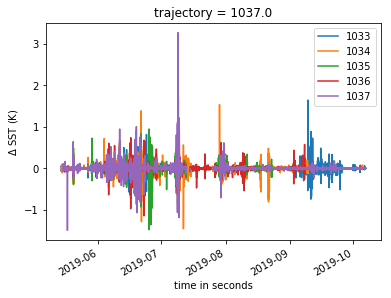

In [40]:
adir = 'F:/data/cruise_data/saildrone/2019_arctic/daily_files/'
strusv=[]
for iusv in range(1033,1038):
    file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
    ds = xr.open_dataset(file)
    ds['spd']=np.sqrt(ds.UWND_MEAN**2+ds.VWND_MEAN**2)
    #ds = ds.where(ds.SA_CTD_RBR_MEAN>20)
    #ds = ds.where(ds.TEMP_SBE37_MEAN>20)
    ds2 = ds.isel(time=slice(250,-1))
    sdif=ds2.TEMP_SBE37_MEAN-ds2.TEMP_CTD_RBR_MEAN
    ax=sdif.plot()
    strusv.append(str(iusv))
    print(iusv,sdif.mean().data,sdif.std().data)
plt.legend(strusv)
plt.ylabel('$\Delta$ SST (K)')

In [41]:
iusv=1035
file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
ds = xr.open_dataset(file)
ds['spd']=np.sqrt(ds.UWND_MEAN**2+ds.VWND_MEAN**2)
#ds = ds.where(ds.SA_CTD_RBR_MEAN>20)
#ds = ds.where(ds.TEMP_SBE37_MEAN>20)
ds2 = ds.isel(time=slice(250,-1))
sdif=ds2.TEMP_SBE37_MEAN-ds2.TEMP_CTD_RBR_MEAN


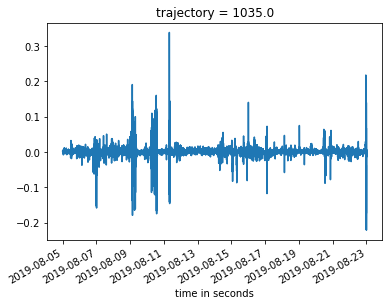

In [47]:
ds2 = ds.sel(time=slice('2019-08-05','2019-08-30'))
sdif=ds2.TEMP_SBE37_MEAN-ds2.TEMP_CTD_RBR_MEAN
sdif.plot()

In [6]:
#Δρ=α*ΔT+βΔS
#α=0.2 #kg m-3 c-1
#β=1 #km m-3 psu-1
s, t, p = 40, 10, 4000
sw.alpha(s,t,p,pt=True)  #salinity psu, temperature deg C, pressure db, pt true if potential
sw.beta(s,t,p,pt=True)  #salinity psu, temperature deg C, pressure db, pt true if potential
sw.aonb(s,t,p,pt=True)
sw.dens0(s,t)

1030.861978077182

In [314]:
iusv=1035
file = adir + 'arctic_2019_sd'+str(iusv)+'-NRT-1_min-v1.nc'
ds = xr.open_dataset(file)
tem=sw.dens0(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN)
ds['density']=xr.DataArray(tem,dims='time',coords={'time':ds.time})
tem=sw.alpha(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
ds['alpha']=xr.DataArray(tem,dims='time',coords={'time':ds.time})
tem=sw.beta(ds.SAL_SBE37_MEAN,ds.TEMP_SBE37_MEAN,ds.BARO_PRES_MEAN*0) #pressure =0 at surface
ds['beta']=xr.DataArray(tem,dims='time',coords={'time':ds.time})
from geopy.distance import vincenty
temdata=[]
for i in range(ds.lat.size-1):
    if np.all(np.isfinite([ds.lat[i:i+2].data,ds.lon[i:i+2].data])):
        coords_1 = (ds.lat[i], ds.lon[i])  #cpr sample location
        coords_2 = (ds.lat[i+1], ds.lon[i+1])  #eddy location
        tem = geopy.distance.distance(coords_1, coords_2).km
        temdata.append(tem)
    else:
        temdata.append(np.nan)
temdata.append(tem)
ds['dist_km']=xr.DataArray(temdata,dims='time',coords={'time':ds.time})


True

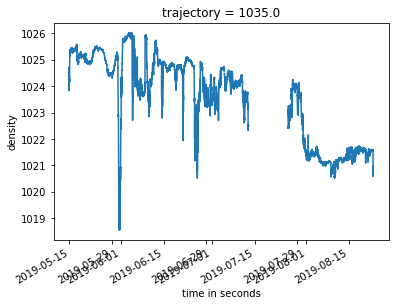

In [97]:
ds.density.plot()

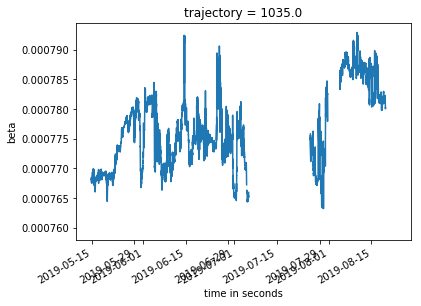

In [102]:

ds.beta.plot()

In [110]:
import geopy
arclen_temp

0.0022065620252362736

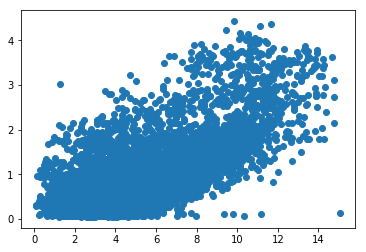

In [122]:
plt.scatter(ds.spd,ds.WAVE_SIGNIFICANT_HEIGHT)

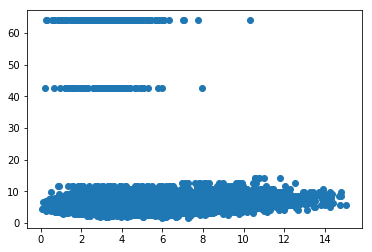

In [123]:
plt.scatter(ds.spd,ds.WAVE_DOMINANT_PERIOD)

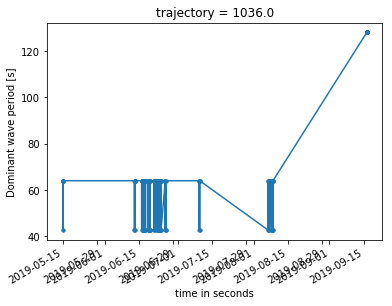

In [124]:
subset=ds.where(ds.WAVE_DOMINANT_PERIOD>20,drop=True)
subset.WAVE_DOMINANT_PERIOD.plot(marker='.')

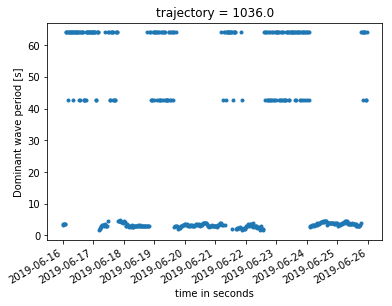

In [28]:
print(subset.time.data)

['2019-05-14T19:00:00.000000000' '2019-05-14T19:30:00.000000000'
 '2019-05-14T20:00:00.000000000' '2019-05-14T20:30:00.000000000'
 '2019-05-14T21:00:00.000000000' '2019-05-14T21:30:00.000000000'
 '2019-05-14T22:00:00.000000000' '2019-05-14T22:30:00.000000000'
 '2019-05-14T23:00:00.000000000' '2019-06-13T04:30:00.000000000'
 '2019-06-13T05:00:00.000000000' '2019-06-13T05:30:00.000000000'
 '2019-06-13T06:00:00.000000000' '2019-06-13T06:30:00.000000000'
 '2019-06-13T07:00:00.000000000' '2019-06-13T07:30:00.000000000'
 '2019-06-13T08:00:00.000000000' '2019-06-13T08:30:00.000000000'
 '2019-06-13T09:00:00.000000000' '2019-06-13T09:30:00.000000000'
 '2019-06-13T10:00:00.000000000' '2019-06-13T10:30:00.000000000'
 '2019-06-16T02:30:00.000000000' '2019-06-16T03:00:00.000000000'
 '2019-06-16T03:30:00.000000000' '2019-06-16T04:00:00.000000000'
 '2019-06-16T04:30:00.000000000' '2019-06-16T05:00:00.000000000'
 '2019-06-16T05:30:00.000000000' '2019-06-16T06:00:00.000000000'
 '2019-06-16T06:30:00.000

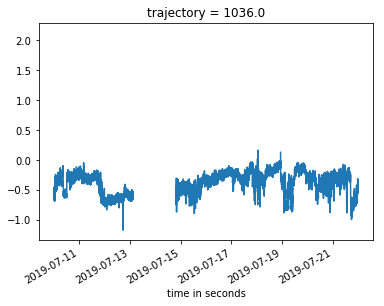

In [44]:
(ds.TEMP_IR_SEA_WING_UNCOMP_MEAN-ds.TEMP_SBE37_MEAN).sel(time=slice('2019-07-10','2019-07-21')).plot()

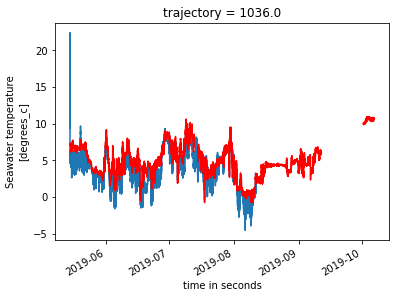

In [48]:
(.96*ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN+0.04*ds.TEMP_IR_SKY_HULL_MEAN).plot()
ds.TEMP_SBE37_MEAN.plot(color='r')

In [85]:
ds=ds.isel(time=slice(200,-1))

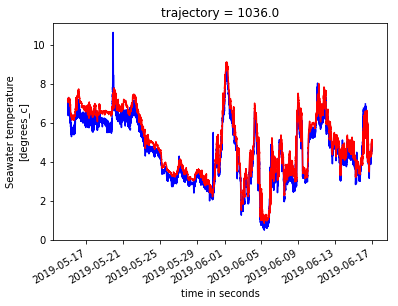

In [112]:
#ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN.plot(color='k')
ds2 = ds.sel(time=slice('2019-05-15','2019-06-16'))
skin=.99*ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN-.01*ds2.TEMP_IR_SKY_HULL_MEAN
#(.98*ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN-.02*ds2.TEMP_IR_SKY_HULL_MEAN).plot(color='b')
skin.plot(color='b')
ds2.TEMP_SBE37_MEAN.plot(color='r')
#0.04*(ds2.TEMP_IR_SKY_HULL_MEAN).plot()

In [114]:
skin=.99*ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN-.01*ds2.TEMP_IR_SKY_HULL_MEAN
print((skin-ds2.TEMP_SBE37_MEAN).std().data)
skin=ds2.TEMP_IR_SEA_WING_UNCOMP_MEAN
print((skin-ds2.TEMP_SBE37_MEAN).std().data)

0.2670825129210383
0.2950309002115863


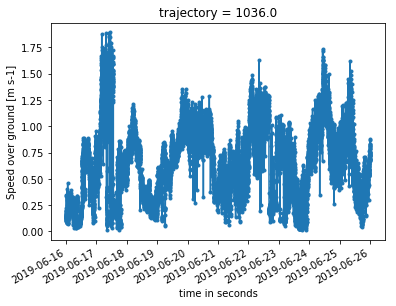

In [71]:
subset=ds.sel(time=slice('2019-06-16','2019-06-25'))
subset.SOG.plot(marker='.')

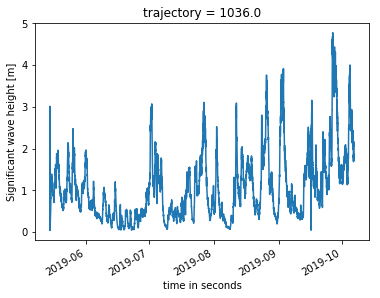

In [67]:
subset = ds.where(np.isfinite(ds.WAVE_SIGNIFICANT_HEIGHT),drop=True)
subset.WAVE_SIGNIFICANT_HEIGHT.plot()

[<xarray.DataArray 'TEMP_IR_SEA_HULL_UNCOMP_MEAN' (time: 208012)>
 array([nan, nan, nan, ..., nan, nan, nan])
 Coordinates:
     trajectory  float32 ...
   * time        (time) datetime64[ns] 2019-05-14T18:12:00 ... 2019-10-06T20:59:00
     lat         (time) float64 ...
     lon         (time) float64 ...
 Attributes:
     standard_name:              sea_surface_skin_temperature
     long_name:                  Hull Sea IR Temperature
     units:                      degrees_c
     update_period:              1000
     nominal_sampling_schedule:  30s on, 270s off, centered at :00
     installed_height:           0.6
     vendor_name:                Heitronics
     model_name:                 CT15.10,
 <xarray.DataArray 'TEMP_IR_SKY_HULL_MEAN' (time: 208012)>
 array([nan, nan, nan, ..., nan, nan, nan])
 Coordinates:
     trajectory  float32 ...
   * time        (time) datetime64[ns] 2019-05-14T18:12:00 ... 2019-10-06T20:59:00
     lat         (time) float64 ...
     lon         (time) 

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
#cond = np.isfinite(ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN) # & np.isfinite(ds.TEMP_IR_SKY_HULL_MEAN) & np.isfinite(ds.TEMP_SBE37_MEAN)
#ds2=ds[cond]
ds2 = ds.where(np.isfinite(ds.TEMP_IR_SEA_HULL_UNCOMP_MEAN))
ds2 = ds2.where(np.isfinite(ds.TEMP_IR_SKY_HULL_MEAN))
ds2 = ds2.where(np.isfinite(ds.TEMP_SBE37_MEAN))


In [78]:
X = [ds2.TEMP_IR_SEA_HULL_UNCOMP_MEAN, ds2.TEMP_IR_SKY_HULL_MEAN]
# y = 1 * x_0 + 2 * x_1 + 3
y = ds2.TEMP_SBE37_MEAN
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
#diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()